## Drinking water potability Prediction

##### In this classification type of problem we will try to predict the potability.The dataset contains water quality metrics for 3276 different water bodies.

##### https://www.kaggle.com/datasets/adityakadiwal/water-potability

#### Attribute information

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.
2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.
3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.
4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.
5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.
6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.
7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.
8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.
9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.
10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

##### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("water_potability.csv")

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
data.shape

(3276, 10)

In [7]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<AxesSubplot:title={'center':'CORRELATION MATRIX'}>

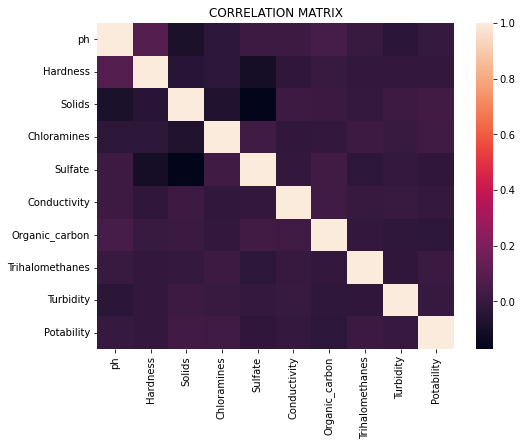

In [8]:
plt.figure(figsize=(8,6))
plt.title("CORRELATION MATRIX")
sns.heatmap(data.corr())

##### We can see that the correlation between the variables are very less.

### HISTOGRAMS

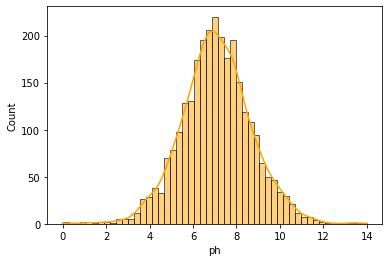

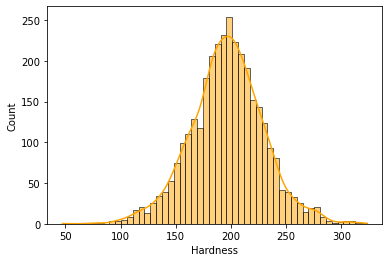

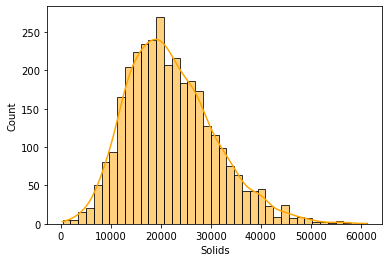

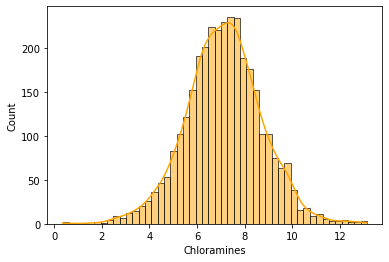

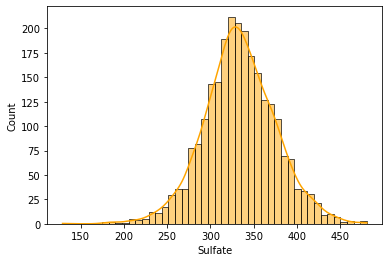

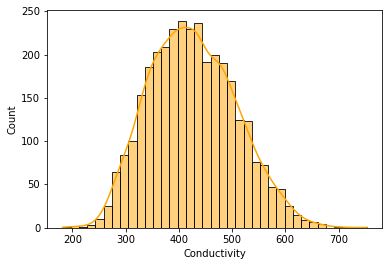

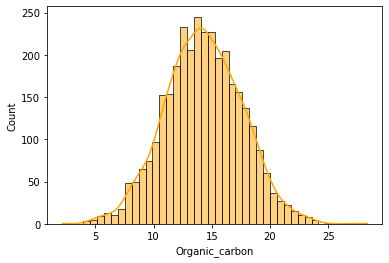

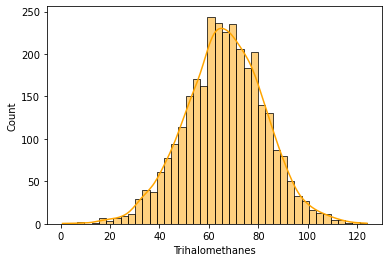

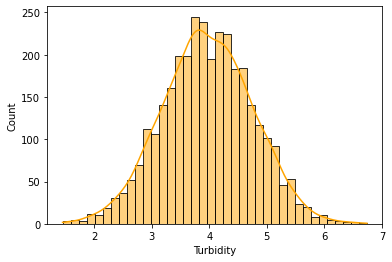

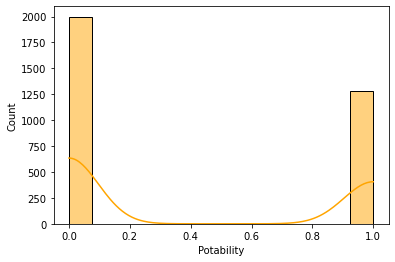

In [9]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.histplot(data, x=data[column], kde=True, color="orange")
        plt.show()

##### We can see there is slight skewness in data.

####  OUTLIER TREATMENT

#### CHECKING THE BOX PLOT

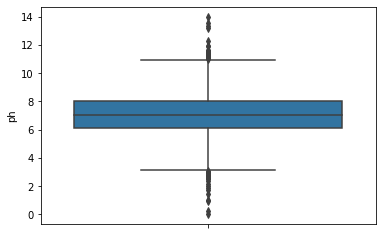

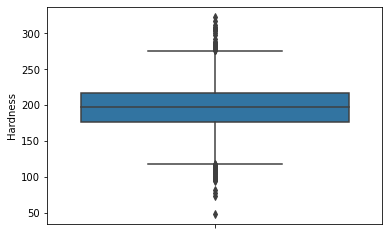

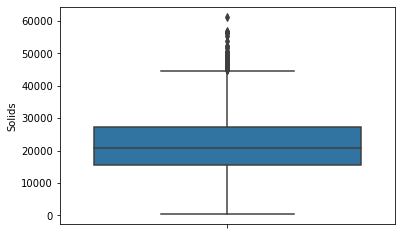

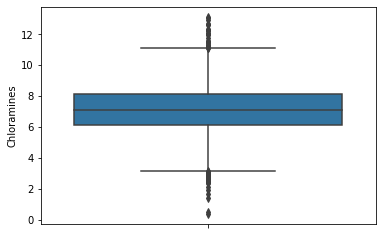

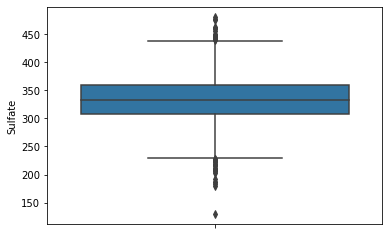

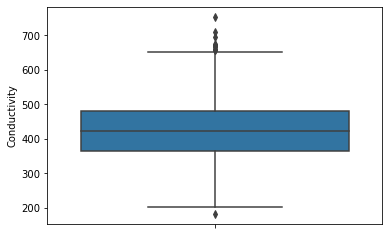

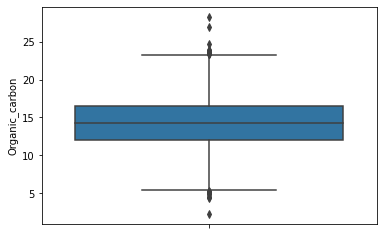

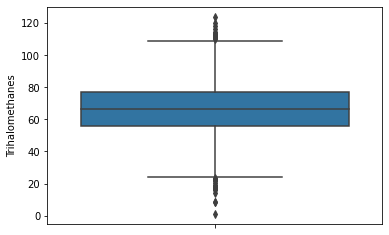

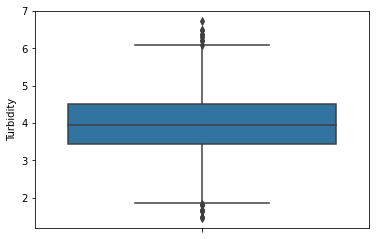

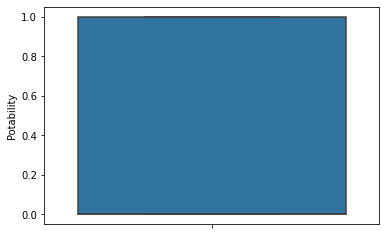

In [10]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.boxplot(y = data[column])
        plt.show()

##### Setting the outlier limits

In [11]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [12]:
for column in data.columns:
    if data[column].dtype != "object":
        UL, LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

##### LETS PLOT THE BARPLOT AGAIN TO SEE THE DIFFERENCE

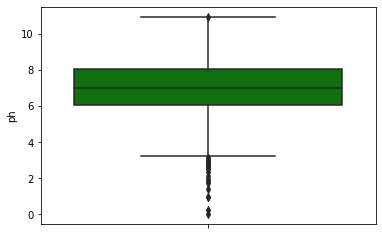

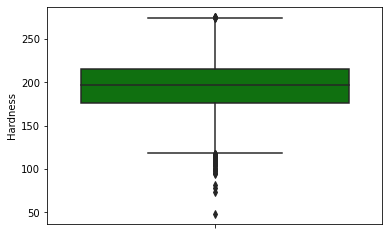

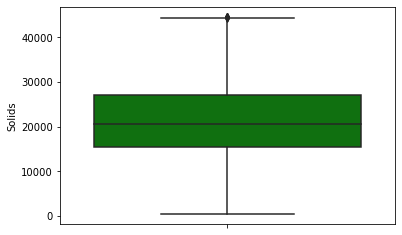

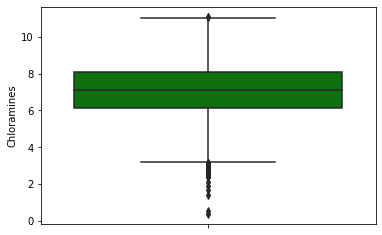

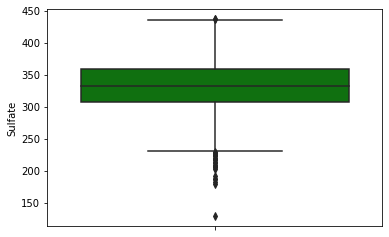

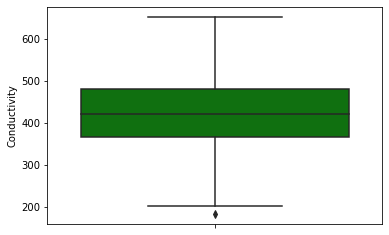

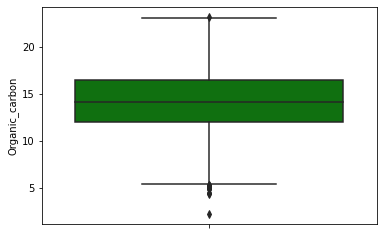

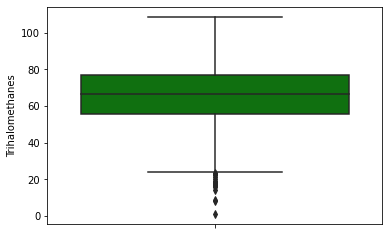

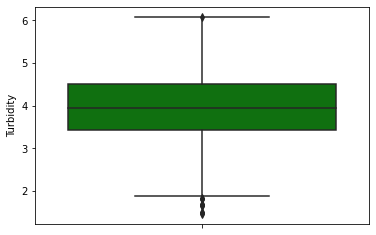

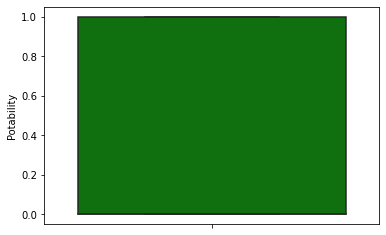

In [13]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.boxplot(y = data[column], color="green")
        plt.show()

In [14]:
null_prcent = data.isnull().mean()*100
null_prcent

ph                 15.750916
Hardness            1.190476
Solids              1.434676
Chloramines         0.915751
Sulfate            24.450549
Conductivity        0.305250
Organic_carbon      0.366300
Trihalomethanes     5.372405
Turbidity           0.274725
Potability          0.000000
dtype: float64

In [15]:
data.dropna(inplace=True)

##### splitting into x & y

In [16]:
x = data.drop('Potability',axis=1).values
y= data['Potability'].values

In [17]:
x.shape

(1887, 9)

In [18]:
y.shape

(1887,)

##### SCALING

In [19]:
sc=StandardScaler()

In [20]:
x = sc.fit_transform(x)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

### MODEL BUILDING

In [22]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "KNeighborsClassifier"   : KNeighborsClassifier(),
    "SVC" : SVC(probability=True)
}

In [23]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    score_train =accuracy_score (y_train, model.predict(x_train))
    score_tst = accuracy_score(y_test, model.predict(x_test))
    con_train = confusion_matrix(y_train, model.predict(x_train))
    con_test = confusion_matrix(y_test, model.predict(x_test))
    print("Model accuracy on train is:: ",score_train)
    print("Model accuracy on test is:: ", score_tst)
    print("confusion_matrix train is:: ", con_train)
    print("confusion_matrix test is:: ", con_test)
    print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
    print("*"*60)


model trained with LogisticRegression
Model accuracy on train is::  0.6017229953611664
Model accuracy on test is::  0.6164021164021164
confusion_matrix train is::  [[896   4]
 [597  12]]
confusion_matrix test is::  [[233   4]
 [141   0]]
Wrong Predictions made: 145 / 378
************************************************************
model trained with DecisionTreeClassifier
Model accuracy on train is::  1.0
Model accuracy on test is::  0.6164021164021164
confusion_matrix train is::  [[900   0]
 [  0 609]]
confusion_matrix test is::  [[157  80]
 [ 65  76]]
Wrong Predictions made: 145 / 378
************************************************************
model trained with RandomForestClassifier
Model accuracy on train is::  1.0
Model accuracy on test is::  0.6904761904761905
confusion_matrix train is::  [[900   0]
 [  0 609]]
confusion_matrix test is::  [[208  29]
 [ 88  53]]
Wrong Predictions made: 117 / 378
************************************************************
model trained with KNei

##### ROC CURVE

Model used is::  LogisticRegression()


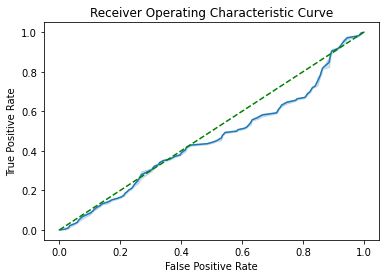

Model used is::  DecisionTreeClassifier()


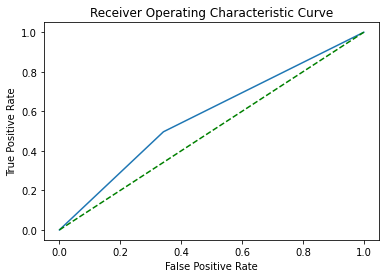

Model used is::  RandomForestClassifier()


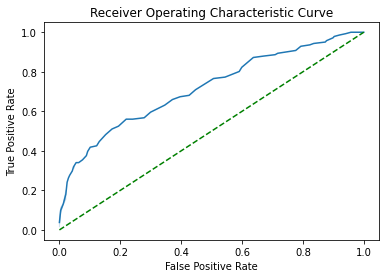

Model used is::  KNeighborsClassifier()


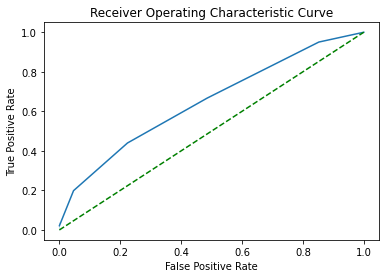

Model used is::  SVC(probability=True)


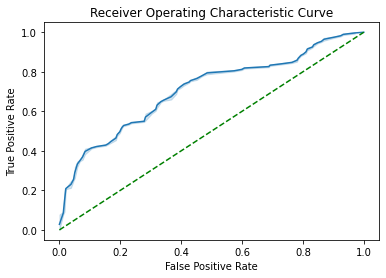

In [24]:
for name, model in models.items():
    model.fit(x_train, y_train)
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print("Model used is:: ",model)
    sns.lineplot(x= fpr, y=tpr)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.show()

##### We can see that best model is Random Forest Classifier. Lets try Hyper parameter tune it.

In [25]:
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

print(r_grid)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'bootstrap': [True, False]}


In [26]:
rfr_random = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=r_grid, n_iter = 20, scoring='neg_mean_absolute_error', cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

In [27]:
rfr_random.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [28]:
rfr_random.best_params_

{'n_estimators': 10,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': True}

In [29]:
best_rfr = RandomForestClassifier(n_estimators= 13,
 max_features='auto',
 max_depth= 10,
 bootstrap= False)

#### Let's predict using the optimised algorithm 

In [30]:
best_rfr.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=13)

In [31]:
score_train =accuracy_score (y_train, best_rfr.predict(x_train))
score_tst = accuracy_score(y_test, best_rfr.predict(x_test))
con_train = confusion_matrix(y_train, best_rfr.predict(x_train))
con_test = confusion_matrix(y_test, best_rfr.predict(x_test))

In [32]:
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=rfr_random.predict(x_test)).sum(),'/',((y_test == rfr_random.predict(x_test)).sum()+(y_test != rfr_random.predict(x_test)).sum()))

Model accuracy on train is::  0.8979456593770709
Model accuracy on test is::  0.6825396825396826
confusion_matrix train is::  [[898   2]
 [152 457]]
confusion_matrix test is::  [[207  30]
 [ 90  51]]
Wrong Predictions made: 133 / 378


##### Lets save the predictions in another Dataframe

In [33]:
OUTPUT= pd.DataFrame(zip(y,best_rfr.predict(x)), columns=("ACTUAL", "PREDICTION"))

In [34]:
OUTPUT["ACTUAL"] = OUTPUT["ACTUAL"].astype("int")
OUTPUT["PREDICTION"] = OUTPUT["PREDICTION"].astype("int")

In [35]:
OUTPUT.head(10)

,ACTUAL,PREDICTION
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,1
7,0,0
8,0,0
9,0,0
